Mostafa Mahmoud Mohamed Noseir

# Sentiment Analysis on Social Media Data

## About the Data

This project uses two datasets collected from popular social media platforms: **Reddit** and **Twitter**. Each dataset consists of user-generated text content labeled with sentiment categories.

### Sentiment labels:
- `1` → Positive
- `0` → Neutral
- `-1` → Negative

---

##  Objective
The goal of this project is to perform **Sentiment Analysis** on social media text data using **Natural Language Processing (NLP)** techniques. 
This analysis helps in understanding public opinion, detecting user mood, and building intelligent systems for content moderation or trend analysis.


### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Description

In [2]:
reddit_df = pd.read_csv('Reddit_Data.csv')
twitter_df = pd.read_csv('Twitter_Data.csv')

In [3]:
reddit_df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
twitter_df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [6]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [7]:
reddit_df.describe(), reddit_df.describe(include='object')

(           category
 count  37249.000000
 mean       0.202771
 std        0.778515
 min       -1.000000
 25%        0.000000
 50%        0.000000
 75%        1.000000
 max        1.000000,
        clean_comment
 count          37149
 unique         36799
 top                 
 freq             115)

In [8]:
twitter_df.describe(), twitter_df.describe(include="object")

(            category
 count  162973.000000
 mean        0.225436
 std         0.781279
 min        -1.000000
 25%         0.000000
 50%         0.000000
 75%         1.000000
 max         1.000000,
                                                clean_text
 count                                              162976
 unique                                             162976
 top     when modi promised “minimum government maximum...
 freq                                                    1)

## Data Preprocessing

### 1. Rename Columns

In [9]:
reddit_df = reddit_df.rename(columns={'clean_comment': 'text', 'category': 'label'})
twitter_df = twitter_df.rename(columns={'clean_text': 'text', 'category': 'label'})

### 2. Add a source column for specific platform

In [10]:
reddit_df['source'] = 'reddit'
twitter_df['source'] = 'twitter'

### 3. Combine datasets

In [11]:
df = pd.concat([reddit_df, twitter_df], ignore_index=True)
df.head()

,text,label,source
0,family mormon have never tried explain them t...,1.0,reddit
1,buddhism has very much lot compatible with chr...,1.0,reddit
2,seriously don say thing first all they won get...,-1.0,reddit
3,what you have learned yours and only yours wha...,0.0,reddit
4,for your own benefit you may want read living ...,1.0,reddit


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200229 entries, 0 to 200228
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   text    200125 non-null  object 
 1   label   200222 non-null  float64
 2   source  200229 non-null  object 
dtypes: float64(1), object(2)
memory usage: 4.6+ MB


In [13]:
df.describe(include='object')

,text,source
count,200125,200229
unique,199715,2
top,,twitter
freq,116,162980


In [14]:
df.describe()

,label
count,200222.000000
mean,0.221219
std,0.780813
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### 4. Check **Duplicates**

In [15]:
df.duplicated().sum()

450

#### Remove **Duplicates**

In [16]:
df.drop_duplicates(inplace=True)

### 5. Check **Missing Values**

In [17]:
df.isna().sum()

text      4
label     7
source    0
dtype: int64

#### Since their counts is very **small** comparing with all dataset so, will **remove** them

In [18]:
df.dropna(inplace=True)

## Exploratory Data Analysis (EDA)

In [19]:
# manually adding annotations to each bar
def annotate_bars(ax):
    for p in ax.patches:
        count = int(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, str(count), ha='center', va='bottom')

### Source Distribution

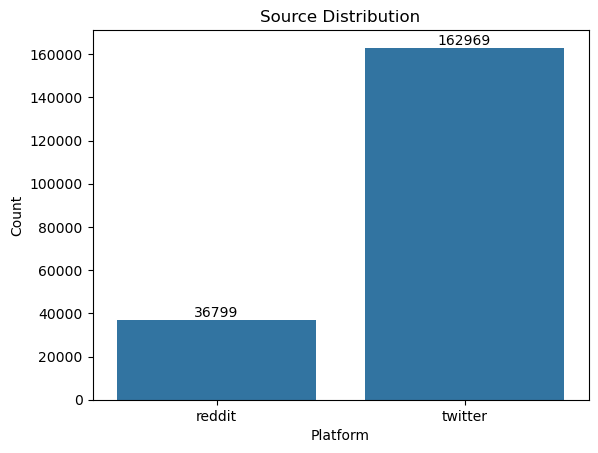

In [20]:
ax = sns.countplot(data=df, x='source')
plt.title("Source Distribution")
plt.xlabel('Platform')
plt.ylabel('Count')

annotate_bars(ax)

#### This figure show that **twitther** is more popular than reddit. 

### Label Distribution

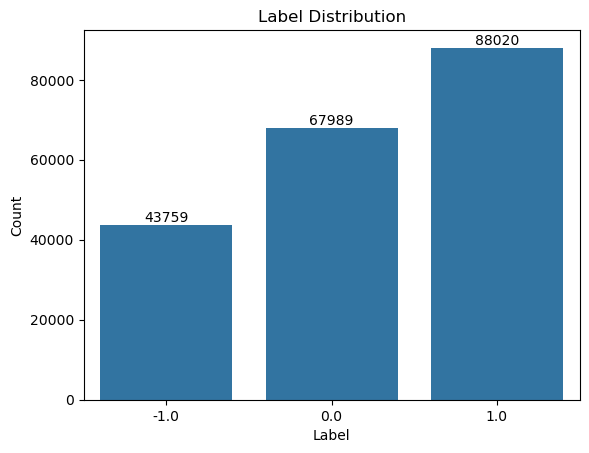

In [21]:
ax = sns.countplot(data=df, x='label')
plt.title("Label Distribution")
plt.xlabel('Label')
plt.ylabel('Count')

annotate_bars(ax)

#### This figure show that **1 (Positive)** is more popular than other labels.

## Text Preprocessing

In [22]:
import re
import nltk

In [23]:
# # Set custom NLTK data path
# nltk.data.path = ['C:/Users/Mostafa/anaconda3/nltk_data']

# # Download required resources into that path
# nltk.download('punkt', download_dir='C:/Users/Mostafa/anaconda3/nltk_data')
# nltk.download('stopwords', download_dir='C:/Users/Mostafa/anaconda3/nltk_data')
# nltk.download('wordnet', download_dir='C:/Users/Mostafa/anaconda3/nltk_data')

In [24]:
# nltk.data.path.append('C:/Users/Mostafa/AppData/Roaming/nltk_data')

In [25]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [26]:
# Initialize tools
tokenizer = TreebankWordTokenizer()
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

### Clean text
#### (remove punctuations and URLs, lowercase, tokenization, remove stopwords & Lemmatization)

In [27]:
# Preprocessing function
def preprocess_text(text):
    # Remove URLs and special characters
    text = re.sub(r"http\S+|www\S+|[^a-zA-Z\s]", "", text.lower())
    # Tokenize
    tokens = tokenizer.tokenize(text)
    # Remove stopwords and lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned)

In [28]:
df['clean_text'] = df['text'].astype(str).apply(preprocess_text)

#### NLP Text Preprocessing Summary

| **Step**                         | **What it Does**                                                                 | **Why it's Important**                                                                 |
|----------------------------------|-----------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------|
| `text.lower()`                   | Converts all characters to lowercase                                             | Ensures uniformity, avoids treating "The" and "the" as different words                |
| `re.sub(...)`                    | Removes URLs, punctuation, and non-alphabetic characters                         | Cleans the text from noise like links, symbols, and numbers                           |
| `tokenizer.tokenize()`          | Splits text into words (tokens)                                                  | Breaks text into individual meaningful units for analysis                             |
| `word not in stop_words`        | Filters out common stopwords like "the", "is", "in"                              | Removes frequently occurring but uninformative words to reduce noise                  |
| `lemmatizer.lemmatize(word)`    | Converts words to their base form (e.g., "running" → "run")                      | Reduces redundancy and groups different forms of the same word                        |

### TF-IDF Vectorization

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### I tried to make vectorization on **'cleaned_text'** but it give me **Less Accuracy**

In [30]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    min_df=3,  # ignore rare words
)

X = vectorizer.fit_transform(df['text'])

#### Exclude **Source**
- **Not Important**. Most NLP models focus on **content** (semantics), not metadata.

In [31]:
X.shape

(199768, 36003)

In [32]:
y = df['label']

#### TF-IDF Vectorization Summary

| **Step**                             | **What it Does**                                                          | **Why it's Important**                                                              |
|--------------------------------------|---------------------------------------------------------------------------|--------------------------------------------------------------------------------------|
| `TfidfVectorizer()`                  | Converts cleaned text into a matrix of TF-IDF features                    | Transforms words into numerical features for machine learning models                |
| `fit_transform(df['clean_text'])`   | Learns vocabulary and calculates TF-IDF scores                            | Highlights important words while down-weighting common ones across all documents    |

In [33]:
# from sklearn.preprocessing import OneHotEncoder
# from scipy.sparse import hstack

# # Encode the source column
# encoder = OneHotEncoder()
# source_encoded = encoder.fit_transform(df[['source']])

# # Combine with TF-IDF matrix
# X_combined = hstack([X, source_encoded])
# X_combined.shape

In [34]:
# X_combined.shape

## Modelling (Logistic Regression)

### Splitting

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling

In [37]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse data
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

### Training

In [38]:
from sklearn.linear_model import LogisticRegression

#### class distribution is **imbalanced**, use class_weight='balanced'

In [39]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

### Evaluation

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [41]:
y_pred = model.predict(X_test)
y_test.head(), y_pred[:5]

(119377    0.0
 98476    -1.0
 2884      1.0
 16737     1.0
 107518    1.0
 Name: label, dtype: float64,
 array([0., 1., 1., 1., 1.]))

In [42]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.87      0.89      0.88      8715
         0.0       0.92      0.98      0.95     13678
         1.0       0.96      0.90      0.93     17561

    accuracy                           0.92     39954
   macro avg       0.92      0.92      0.92     39954
weighted avg       0.93      0.92      0.92     39954



#### Confusion Matrix

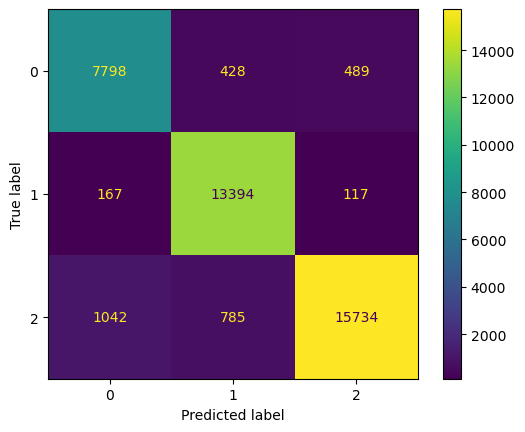

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)) 
disp.plot()

## Modelling (SVM)
use: **Linear Support Vector Classifier**

### Training

In [44]:
from sklearn.svm import LinearSVC

In [45]:
model = LinearSVC(class_weight='balanced')
model.fit(X_train, y_train)

LinearSVC(class_weight='balanced')

### Evaluation

In [46]:
y_pred = model.predict(X_test)
y_test.head(), y_pred[:5]

(119377    0.0
 98476    -1.0
 2884      1.0
 16737     1.0
 107518    1.0
 Name: label, dtype: float64,
 array([ 0., -1.,  1.,  1.,  1.]))

In [47]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.90      0.91      0.91      8715
         0.0       0.96      0.98      0.97     13678
         1.0       0.96      0.94      0.95     17561

    accuracy                           0.95     39954
   macro avg       0.94      0.94      0.94     39954
weighted avg       0.95      0.95      0.95     39954



#### Confusion Matrix

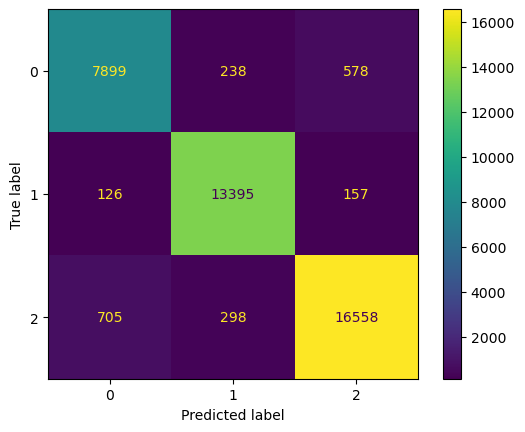

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)) 
disp.plot()

## Create Pipeline

In [49]:
# Define preprocessing function
def preprocess_text(text_series):
    return text_series.apply(lambda text: ' '.join([
        lemmatizer.lemmatize(word)
        for word in tokenizer.tokenize(re.sub(r"http\S+|www\S+|[^a-zA-Z\s]", "", text.lower()))
        if word not in stop_words
    ]))

### Wrap in transformer
This wraps your preprocess_text function inside a scikit-learn-compatible transformer. It allows you to use custom Python functions inside a Pipeline, just like StandardScaler, TfidfVectorizer, etc.

In [50]:
from sklearn.preprocessing import FunctionTransformer

text_cleaner = FunctionTransformer(preprocess_text)

#### Will not use it

In [51]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(min_df=3)),
    ('classifier', LinearSVC(class_weight='balanced'))
])

In [52]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(min_df=3)),
                ('classifier', LinearSVC(class_weight='balanced'))])

In [54]:
y_pred = pipe.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.90      0.91      0.91      8715
         0.0       0.96      0.98      0.97     13678
         1.0       0.96      0.94      0.95     17561

    accuracy                           0.95     39954
   macro avg       0.94      0.94      0.94     39954
weighted avg       0.95      0.95      0.95     39954



### Pipeline Saving

In [55]:
import joblib

joblib.dump(pipe, 'sentiment_classifier_pipeline.pkl')

['sentiment_classifier_pipeline.pkl']